# Tokenization

In this notebook, you'll see how to use the NLTK library to tokenize and normalize text data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from collections import Counter

from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
nltk.download("stopwords")
nltk.download("punkt_tab")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/drewrichard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/drewrichard/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/drewrichard/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In this notebook, we'll be working with the full text of Moby Dick.

In [3]:
with open('../data/moby_dick.txt', encoding = 'utf-8') as fi:
    moby = fi.read()

In [4]:
moby[:1000]

'  ETYMOLOGY.\n\n\n  (Supplied by a Late Consumptive Usher to a Grammar School.)\n\n  The pale Usher—threadbare in coat, heart, body, and brain; I see him\n  now. He was ever dusting his old lexicons and grammars, with a queer\n  handkerchief, mockingly embellished with all the gay flags of all the\n  known nations of the world. He loved to dust his old grammars; it\n  somehow mildly reminded him of his mortality.\n\n  “While you take in hand to school others, and to teach them by what\n  name a whale-fish is to be called in our tongue, leaving out, through\n  ignorance, the letter H, which almost alone maketh up the\n  signification of the word, you deliver that which is not true.”\n  —_Hackluyt._\n\n  “WHALE. * * * Sw. and Dan. _hval_. This animal is named from\n  roundness or rolling; for in Dan. _hvalt_ is arched or vaulted.”\n  —_Webster’s Dictionary._\n\n  “WHALE. * * * It is more immediately from the Dut. and Ger. _Wallen_;\n  A.S. _Walw-ian_, to roll, to wallow.” —_Richardson’s

First, let's split into sentences. For this, we can use the `sent_tokenize` function.

In [5]:
sentences = sent_tokenize(moby)

In [6]:
print(sentences[1000])

Because no man can ever feel his own identity aright
except his eyes be closed; as if darkness were indeed the proper
element of our essences, though light be more congenial to our clayey
part.


If we want to split into tokens, we can utilize one of nltk's word tokenizers.

In [7]:
i = 1000
print(sentences[i])
word_tokenize(sentences[i])

Because no man can ever feel his own identity aright
except his eyes be closed; as if darkness were indeed the proper
element of our essences, though light be more congenial to our clayey
part.


['Because',
 'no',
 'man',
 'can',
 'ever',
 'feel',
 'his',
 'own',
 'identity',
 'aright',
 'except',
 'his',
 'eyes',
 'be',
 'closed',
 ';',
 'as',
 'if',
 'darkness',
 'were',
 'indeed',
 'the',
 'proper',
 'element',
 'of',
 'our',
 'essences',
 ',',
 'though',
 'light',
 'be',
 'more',
 'congenial',
 'to',
 'our',
 'clayey',
 'part',
 '.']

Notice how `word_tokenize` counts punctuation marks as tokens. If we want to be more specific in what we count as a token, we can make use of the `regexp_tokenize` function which allows us to specify a regular expression pattern to define a token.

For example, we can look for word characters using `\w`. This will match one or more of any letter or digit.

In [8]:
regexp_tokenize(sentences[1000], r'\w+')

['Because',
 'no',
 'man',
 'can',
 'ever',
 'feel',
 'his',
 'own',
 'identity',
 'aright',
 'except',
 'his',
 'eyes',
 'be',
 'closed',
 'as',
 'if',
 'darkness',
 'were',
 'indeed',
 'the',
 'proper',
 'element',
 'of',
 'our',
 'essences',
 'though',
 'light',
 'be',
 'more',
 'congenial',
 'to',
 'our',
 'clayey',
 'part']

Let's add a couple of other types of characters to catch and then count up the most frequent tokens using the `Counter` class. This will create a dictionary whose keys are the tokens and values are the frequency counts.

In [9]:
moby_counter = Counter(regexp_tokenize(moby, r'[-\'\w]+'))

In [10]:
moby_counter['whale']

790

In [11]:
moby_counter['Ishmael']

19

Let's see how large a vocabulary we have.

In [12]:
len(moby_counter)

20302

Or how many total words.

In [13]:
sum(moby_counter.values())

216124

We can also see the most common words.

In [14]:
moby_counter.most_common()

[('the', 13796),
 ('of', 6557),
 ('and', 6044),
 ('a', 4567),
 ('to', 4532),
 ('in', 3924),
 ('that', 2981),
 ('his', 2472),
 ('it', 2210),
 ('I', 2120),
 ('s', 1779),
 ('is', 1697),
 ('with', 1662),
 ('he', 1662),
 ('was', 1633),
 ('as', 1620),
 ('all', 1450),
 ('for', 1420),
 ('this', 1280),
 ('at', 1234),
 ('by', 1141),
 ('but', 1113),
 ('not', 1104),
 ('him', 1060),
 ('from', 1059),
 ('be', 1027),
 ('on', 1014),
 ('so', 915),
 ('one', 883),
 ('you', 841),
 ('whale', 790),
 ('had', 767),
 ('have', 760),
 ('there', 716),
 ('But', 705),
 ('or', 701),
 ('were', 679),
 ('now', 646),
 ('which', 642),
 ('me', 625),
 ('their', 614),
 ('The', 612),
 ('they', 587),
 ('are', 586),
 ('an', 582),
 ('some', 580),
 ('then', 571),
 ('my', 564),
 ('like', 558),
 ('when', 554),
 ('upon', 539),
 ('into', 521),
 ('out', 519),
 ('Ahab', 505),
 ('up', 501),
 ('more', 501),
 ('no', 486),
 ('man', 481),
 ('them', 474),
 ('ship', 462),
 ('ye', 461),
 ('what', 442),
 ('old', 429),
 ('if', 421),
 ('would', 4

You'll notice that the most common words include a large number of words like "the" and "of". These can be considered "stop words", and in certain applications are less interesting and can be removed.

NLTK includes lists of stop words.

In [15]:
stop_words = set(stopwords.words('english'))

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

Let's make two modifications to our counter above. First, we'll covert all text to lowercase and the we'll remove stop words.

In [16]:
moby_counter = Counter([x.lower() for x in regexp_tokenize(moby, r'[-\'\w]+') if x.lower() not in stop_words])

In [17]:
len(moby_counter)

18550

In [18]:
moby_counter.most_common()

[('whale', 1081),
 ('one', 912),
 ('like', 581),
 ('upon', 565),
 ('ahab', 506),
 ('man', 499),
 ('ye', 471),
 ('ship', 470),
 ('old', 443),
 ('would', 430),
 ('sea', 384),
 ('though', 384),
 ('yet', 344),
 ('time', 326),
 ('captain', 324),
 ('long', 316),
 ('still', 312),
 ('said', 305),
 ('great', 304),
 ('boat', 287),
 ('two', 286),
 ('must', 283),
 ('seemed', 283),
 ('head', 277),
 ('last', 276),
 ('see', 272),
 ('thou', 271),
 ('whales', 267),
 ('way', 266),
 ('stubb', 255),
 ('queequeg', 252),
 ('little', 249),
 ('white', 248),
 ('round', 245),
 ('say', 244),
 ('three', 239),
 ('may', 238),
 ('men', 237),
 ('sperm', 237),
 ('first', 235),
 ('every', 232),
 ('us', 228),
 ('much', 223),
 ('well', 222),
 ('could', 216),
 ('never', 206),
 ('hand', 204),
 ('good', 198),
 ('starbuck', 198),
 ('almost', 195),
 ('ever', 194),
 ('go', 192),
 ('even', 189),
 ('side', 189),
 ('thing', 188),
 ('look', 185),
 ('might', 183),
 ('away', 180),
 ('come', 179),
 ('made', 177),
 ('chapter', 173),
 

We might also want to do further preprocessing of our text. Let's try stemming and lemmatization. First, let's look at stemming. We'll try out the PorterStemmer from NLTK.

In [19]:
porter = PorterStemmer()

To use it, you just need to call the `.stem` method and pass in the token to be stemmed.

In [20]:
porter.stem('whales')

'whale'

In [21]:
porter.stem('numerical')

'numer'

In [22]:
moby_counter = Counter([porter.stem(x.lower()) for x in regexp_tokenize(moby, r'[-\'\w]+') if x.lower() not in stop_words])

In [23]:
len(moby_counter)

12349

In [24]:
moby_counter.most_common()

[('whale', 1462),
 ('one', 932),
 ('like', 595),
 ('upon', 565),
 ('ship', 565),
 ('ye', 546),
 ('man', 512),
 ('ahab', 507),
 ('sea', 471),
 ('seem', 463),
 ('old', 443),
 ('time', 441),
 ('boat', 431),
 ('would', 430),
 ('though', 384),
 ('hand', 349),
 ('captain', 346),
 ('yet', 344),
 ('head', 340),
 ('look', 333),
 ('say', 330),
 ('long', 321),
 ('thing', 320),
 ('still', 315),
 ('see', 312),
 ('great', 306),
 ('said', 305),
 ('two', 289),
 ('come', 286),
 ('way', 285),
 ('must', 283),
 ('last', 280),
 ('white', 278),
 ('go', 277),
 ('eye', 271),
 ('thou', 271),
 ('round', 258),
 ('stubb', 257),
 ('queequeg', 252),
 ('littl', 249),
 ('harpoon', 248),
 ('day', 243),
 ('three', 242),
 ('may', 238),
 ('men', 237),
 ('sperm', 237),
 ('water', 236),
 ('first', 235),
 ('everi', 232),
 ('us', 228),
 ('well', 223),
 ('much', 223),
 ('side', 218),
 ('could', 216),
 ('take', 215),
 ('cri', 214),
 ('turn', 213),
 ('stand', 212),
 ('even', 207),
 ('never', 206),
 ('good', 204),
 ('part', 199)

One disadvanatage of stemming is that you can end up with non-words.

In [25]:
porter.stem('remove')

'remov'

We might instead try a lemmatizer, like the WordNetLemmatizer from NLTK.

In [26]:
wnl = WordNetLemmatizer()

In [27]:
wnl.lemmatize('whales')

'whale'

In [28]:
moby_counter = Counter([wnl.lemmatize(x.lower()) for x in regexp_tokenize(moby, r'[-\'\w]+') if x.lower() not in stop_words])

In [29]:
len(moby_counter)

16573

In [30]:
moby_counter.most_common()

[('whale', 1348),
 ('one', 931),
 ('like', 584),
 ('upon', 565),
 ('ship', 547),
 ('ahab', 507),
 ('man', 499),
 ('ye', 471),
 ('sea', 471),
 ('old', 443),
 ('time', 438),
 ('boat', 431),
 ('would', 430),
 ('though', 384),
 ('captain', 346),
 ('yet', 344),
 ('hand', 332),
 ('head', 321),
 ('thing', 320),
 ('long', 316),
 ('still', 312),
 ('said', 305),
 ('great', 304),
 ('say', 290),
 ('two', 289),
 ('way', 285),
 ('must', 283),
 ('seemed', 283),
 ('last', 277),
 ('see', 276),
 ('thou', 271),
 ('stubb', 255),
 ('queequeg', 252),
 ('white', 250),
 ('little', 249),
 ('round', 248),
 ('go', 247),
 ('day', 243),
 ('three', 242),
 ('eye', 238),
 ('may', 238),
 ('men', 237),
 ('sperm', 237),
 ('water', 236),
 ('first', 235),
 ('every', 232),
 ('come', 232),
 ('u', 230),
 ('well', 223),
 ('much', 223),
 ('could', 216),
 ('side', 216),
 ('look', 212),
 ('never', 206),
 ('good', 199),
 ('starbuck', 198),
 ('almost', 195),
 ('ever', 194),
 ('even', 189),
 ('part', 189),
 ('deck', 184),
 ('though

Finally, let's look at the distribution of words.

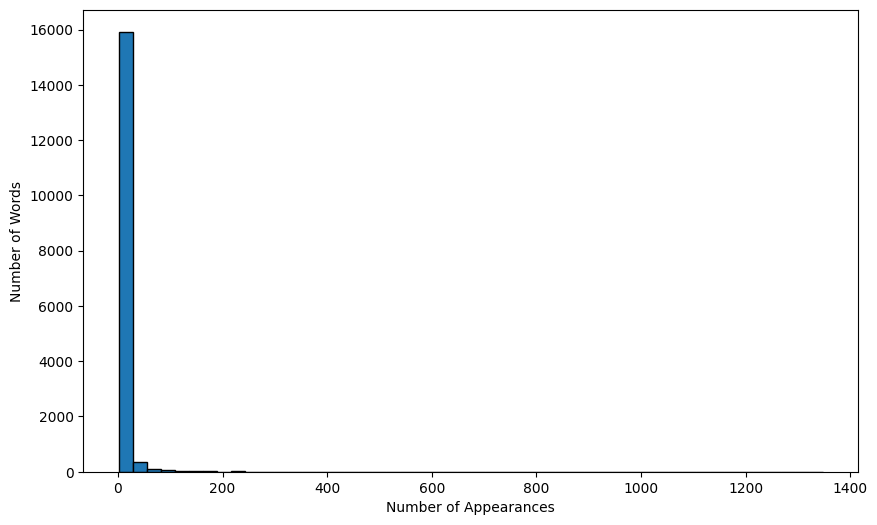

In [31]:
plt.figure(figsize = (10,6))
plt.hist(moby_counter.values(), bins = 50, edgecolor = 'black')
plt.xlabel('Number of Appearances')
plt.ylabel('Number of Words');

In [32]:
pd.Series(moby_counter.values()).describe()

count    16573.000000
mean         6.551077
std         26.025339
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1348.000000
dtype: float64

If we want a fun way to visualize the most frequent words in the text, we can use a word cloud.

In [33]:
# %conda install wordcloud

In [34]:
from wordcloud import WordCloud

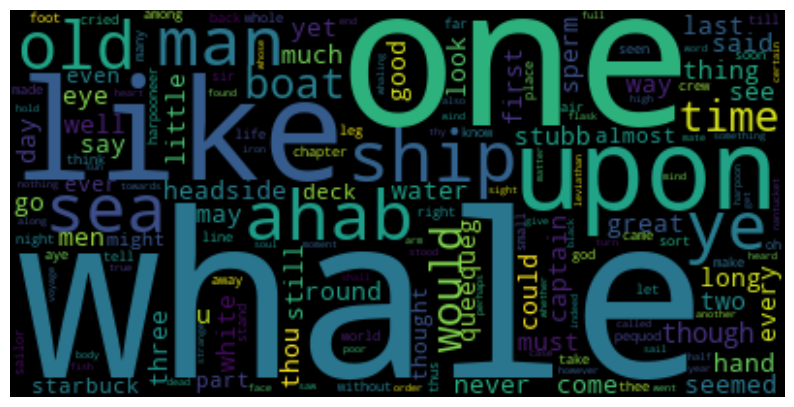

In [35]:
wc = WordCloud()

wc.generate_from_frequencies(moby_counter)
plt.figure(figsize = (10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");